In [52]:
import sherpa
import numpy as np 
import seir_func
import matplotlib.pyplot as plt
import map_functions

In [53]:
city = "rj"
time_stamp = 3 * 365
incidence_real = map_functions.get_cases(city=city)[:time_stamp]
infected_percentage = incidence_real[0]/map_functions.pop_dict[city]

In [54]:
infected_percentage

1.039709629894563e-06

In [55]:
seir = seir_func.seir()

In [56]:
parameters = [sherpa.Continuous(name="SH", range=[0,1]),
              sherpa.Continuous(name="u_v", range=[0.5, 2]),
              sherpa.Continuous(name="p_mh(t)", range=[0.5, 2]),
              sherpa.Continuous(name="a(t)", range=[0.5, 2]),
              sherpa.Continuous(name="\gamma", range=[0.5, 2]),
              sherpa.Continuous(name="\delta", range=[0.5, 2]),
              sherpa.Continuous(name="k", range=[0.5, 2])]

In [57]:
algorithm = sherpa.algorithms.RandomSearch(max_num_trials=500)

In [58]:
study = sherpa.Study(parameters=parameters,
                     algorithm=algorithm,
                     lower_is_better=True)

INFO:sherpa.core:
-------------------------------------------------------
SHERPA Dashboard running. Access via
http://127.0.1.1:8880 if on a cluster or
http://localhost:8880 if running locally.
-------------------------------------------------------


 * Serving Flask app "sherpa.app.app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [59]:
for trial in study:
    print("Trial {}:\t{}".format(trial.id, trial.parameters))
    parameters = [1, 1, trial.parameters['a(t)'], 
                  1, 1, trial.parameters['p_mh(t)'], 
                  1, 1, trial.parameters['u_v'], 
                  1, 1, 1, trial.parameters['k'], 
                  1, trial.parameters['\gamma'], 
                  trial.parameters['\delta'], 1]
    estado_inicial = np.array([[
        1000, 0, 0.99, 0, 0.0, 
        trial.parameters['SH'], infected_percentage, infected_percentage, 
        1 - trial.parameters['SH'] - 2 * infected_percentage
    ]])
    seir.update_parameters(parameters, estado_inicial)
    incidence_simulated = seir.emulate(time_stamp = time_stamp)
    sse = np.power(np.power(incidence_simulated[:, 9][:time_stamp] - incidence_real, 2).sum(),0.5)
    # access parameters via trial.parameters and id via trial.id
    #print(pseudo_loss)
    # add observations once or multiple times
    study.add_observation(trial=trial,
                          objective=sse)

    study.finalize(trial=trial)

Trial 1:	{'SH': 0.14423120099054831, 'u_v': 1.4080172856234574, 'p_mh(t)': 0.8695107573498524, 'a(t)': 1.146451683481597, '\\gamma': 1.7432270120425026, '\\delta': 0.7327711549929934, 'k': 0.9211263171407076}
Trial 2:	{'SH': 0.0017540351802505239, 'u_v': 0.9100340134381517, 'p_mh(t)': 0.8260455493660007, 'a(t)': 0.8153529681401834, '\\gamma': 1.4025001210280605, '\\delta': 1.4667212931052722, 'k': 1.9610254133740586}
Trial 3:	{'SH': 0.025778145836457655, 'u_v': 1.8308877237994854, 'p_mh(t)': 1.4214854529109198, 'a(t)': 0.9113423478436993, '\\gamma': 0.6721623241417981, '\\delta': 1.578523298444812, 'k': 0.6376893284087584}
Trial 4:	{'SH': 0.902996388237373, 'u_v': 0.7541970435773939, 'p_mh(t)': 1.0289970396008816, 'a(t)': 1.7198434882531393, '\\gamma': 1.4745161468285375, '\\delta': 0.952025940726847, 'k': 1.0483513137758869}
Trial 5:	{'SH': 0.004979540246980885, 'u_v': 0.616918732502364, 'p_mh(t)': 1.3898681187707076, 'a(t)': 1.0776267167250044, '\\gamma': 0.7390554950471816, '\\delta

Trial 41:	{'SH': 0.8962681557888256, 'u_v': 1.5445394941581845, 'p_mh(t)': 1.0747899656302502, 'a(t)': 0.7409449006065836, '\\gamma': 1.8372943318280028, '\\delta': 1.687616297980279, 'k': 1.8737732711084838}
Trial 42:	{'SH': 0.647967160993479, 'u_v': 0.8248396700307035, 'p_mh(t)': 1.7798515369902066, 'a(t)': 1.343371971089199, '\\gamma': 1.9792513347819405, '\\delta': 1.7304166987789198, 'k': 0.7861794704672543}
Trial 43:	{'SH': 0.3452584682295574, 'u_v': 0.5120738188406342, 'p_mh(t)': 0.5026254666166581, 'a(t)': 0.790809814134512, '\\gamma': 1.0806678119443645, '\\delta': 1.7607337509225707, 'k': 1.0222299748250454}
Trial 44:	{'SH': 0.49415062765793616, 'u_v': 1.859669949950597, 'p_mh(t)': 1.7777068784787446, 'a(t)': 1.1018320287580745, '\\gamma': 0.7963395394720315, '\\delta': 0.7202665520595374, 'k': 1.4429103685692413}
Trial 45:	{'SH': 0.5369344506768259, 'u_v': 1.0567738977356091, 'p_mh(t)': 1.2746559792481564, 'a(t)': 1.2939902773989447, '\\gamma': 1.7740281776018176, '\\delta':

Trial 81:	{'SH': 0.9454128181370457, 'u_v': 0.5809217034164, 'p_mh(t)': 1.9882013858396188, 'a(t)': 1.202311827723561, '\\gamma': 1.4581075846763303, '\\delta': 1.3327088761443693, 'k': 1.4224341726582288}
Trial 82:	{'SH': 0.10902433478626905, 'u_v': 1.9130806864378478, 'p_mh(t)': 0.6874194778609855, 'a(t)': 1.599941569748385, '\\gamma': 1.2686643708560905, '\\delta': 0.6425809460549952, 'k': 1.1734555620094893}
Trial 83:	{'SH': 0.26204285848206754, 'u_v': 0.7829212573913916, 'p_mh(t)': 0.9297813527166423, 'a(t)': 1.1927868183349721, '\\gamma': 1.2958489589694924, '\\delta': 1.698952101341518, 'k': 0.6441202482315149}
Trial 84:	{'SH': 0.4128921099934082, 'u_v': 0.859840035633675, 'p_mh(t)': 0.7161095596311533, 'a(t)': 0.5517104160584865, '\\gamma': 0.6856648747472425, '\\delta': 1.346459768054371, 'k': 1.9256667684451443}
Trial 85:	{'SH': 0.846988747882302, 'u_v': 1.9753265718181168, 'p_mh(t)': 1.2769036381627294, 'a(t)': 1.2924263901625448, '\\gamma': 1.4973659981739171, '\\delta': 1.

Trial 121:	{'SH': 0.8151334358828475, 'u_v': 1.5098756141003435, 'p_mh(t)': 0.9257814931207384, 'a(t)': 1.750437142551641, '\\gamma': 1.3201628296913888, '\\delta': 0.7200484711116071, 'k': 0.7331749480552026}
Trial 122:	{'SH': 0.1035433386920025, 'u_v': 1.5861973871033617, 'p_mh(t)': 0.5458097453865094, 'a(t)': 1.3750587709282802, '\\gamma': 1.434528359640053, '\\delta': 0.9480427721337483, 'k': 1.4682979038979391}
Trial 123:	{'SH': 0.045515605315103125, 'u_v': 1.8276447162046856, 'p_mh(t)': 1.0932754845341248, 'a(t)': 0.5542267184080504, '\\gamma': 0.7978274276555244, '\\delta': 0.8014548655283417, 'k': 1.4642508278914474}
Trial 124:	{'SH': 0.6855057293243244, 'u_v': 1.1724172395814558, 'p_mh(t)': 1.7173885664824382, 'a(t)': 1.8045280867004052, '\\gamma': 1.552859523526259, '\\delta': 1.562612818975179, 'k': 1.2192365915588734}
Trial 125:	{'SH': 0.0022510509151123514, 'u_v': 1.3234755145205854, 'p_mh(t)': 1.9029415328034496, 'a(t)': 1.1231404730146761, '\\gamma': 1.0911203997385879, 

Trial 160:	{'SH': 0.9552806708912476, 'u_v': 0.8104938399366446, 'p_mh(t)': 0.582939705294274, 'a(t)': 0.6041902559940879, '\\gamma': 0.9429320147563802, '\\delta': 1.8031748857860612, 'k': 0.7198844340866285}
Trial 161:	{'SH': 0.12662101858082242, 'u_v': 1.8916141372553812, 'p_mh(t)': 1.569295188724893, 'a(t)': 0.502169970487482, '\\gamma': 0.7643479904316279, '\\delta': 1.3288354445897521, 'k': 0.5949737654707723}
Trial 162:	{'SH': 0.8980999840665945, 'u_v': 0.7672527331598789, 'p_mh(t)': 1.793266754355405, 'a(t)': 1.0305666697286664, '\\gamma': 1.8320929842528542, '\\delta': 0.8147383608969305, 'k': 1.364321164927614}
Trial 163:	{'SH': 0.716155402183718, 'u_v': 0.6309445006945236, 'p_mh(t)': 1.6550923505305475, 'a(t)': 1.471213929354907, '\\gamma': 0.9902482324757809, '\\delta': 1.0329469846346417, 'k': 1.2520275093821736}
Trial 164:	{'SH': 0.3880399331779344, 'u_v': 1.2696517106926697, 'p_mh(t)': 1.2581694805740897, 'a(t)': 0.6219560712337144, '\\gamma': 0.7353387158645237, '\\delt

Trial 199:	{'SH': 0.6276339904600787, 'u_v': 0.7842798375692677, 'p_mh(t)': 1.4235970877516877, 'a(t)': 1.445007734640054, '\\gamma': 0.9815487646271348, '\\delta': 1.9155938500643657, 'k': 0.6596830678827851}
Trial 200:	{'SH': 0.25588610378221177, 'u_v': 0.8668227453563886, 'p_mh(t)': 1.711125133445818, 'a(t)': 1.1428248455779262, '\\gamma': 0.5332756355720978, '\\delta': 1.6834858097691368, 'k': 1.8557047096760908}
Trial 201:	{'SH': 0.914746004264474, 'u_v': 0.591285651745635, 'p_mh(t)': 1.273473405535519, 'a(t)': 1.9896490635562802, '\\gamma': 0.558252369749373, '\\delta': 1.7118118776898679, 'k': 1.2658632765862925}
Trial 202:	{'SH': 0.09357181171765738, 'u_v': 1.301013209628341, 'p_mh(t)': 1.6949455329498744, 'a(t)': 1.1931257553930839, '\\gamma': 1.7893894039486749, '\\delta': 1.5914183024899318, 'k': 1.726602389956351}
Trial 203:	{'SH': 0.9184347973672511, 'u_v': 1.9164745538681516, 'p_mh(t)': 0.5264628117356263, 'a(t)': 0.8037904450459403, '\\gamma': 1.941904186758662, '\\delta

Trial 239:	{'SH': 0.8479587981745205, 'u_v': 0.9362220947665758, 'p_mh(t)': 1.593366658587772, 'a(t)': 0.9736381281889002, '\\gamma': 1.3420394204298574, '\\delta': 1.2023661291914411, 'k': 1.7227560308510017}
Trial 240:	{'SH': 0.05039964291496957, 'u_v': 1.635953074782991, 'p_mh(t)': 0.9840514525183822, 'a(t)': 0.9948655036843266, '\\gamma': 1.736488254323138, '\\delta': 1.7130023282062679, 'k': 1.7441492915492118}
Trial 241:	{'SH': 0.9456583337992224, 'u_v': 1.2669322267794325, 'p_mh(t)': 1.6546764039247401, 'a(t)': 1.7344883585118798, '\\gamma': 1.792280209269701, '\\delta': 0.6097267999021477, 'k': 0.8346521560931964}
Trial 242:	{'SH': 0.8484340722156065, 'u_v': 0.7658610486139258, 'p_mh(t)': 1.9254738576176413, 'a(t)': 1.8724614359163996, '\\gamma': 1.229468952192088, '\\delta': 0.5105458907568384, 'k': 1.0447008495205514}
Trial 243:	{'SH': 0.155179737944956, 'u_v': 0.9520516332954603, 'p_mh(t)': 1.5036329557898496, 'a(t)': 0.5128518443055068, '\\gamma': 0.55938222773141, '\\delta

Trial 278:	{'SH': 0.8898279187531704, 'u_v': 1.2280115607702127, 'p_mh(t)': 0.5303864393532522, 'a(t)': 1.4410390225137661, '\\gamma': 1.0459853040101696, '\\delta': 1.7023534410601782, 'k': 0.9754746318103302}
Trial 279:	{'SH': 0.6418370473775019, 'u_v': 0.573923900072649, 'p_mh(t)': 1.1644154702352245, 'a(t)': 1.5743828456736373, '\\gamma': 1.5064435592003989, '\\delta': 0.8035921469779455, 'k': 0.756730048897014}
Trial 280:	{'SH': 0.3755968528335327, 'u_v': 0.5406828705921534, 'p_mh(t)': 1.685374658180847, 'a(t)': 0.5908469219910535, '\\gamma': 1.23559398861012, '\\delta': 1.1948102205149855, 'k': 1.5456406681719193}
Trial 281:	{'SH': 0.3581719843571892, 'u_v': 0.7718211299594459, 'p_mh(t)': 0.524403583192132, 'a(t)': 1.9684492141402858, '\\gamma': 1.2100413074502157, '\\delta': 0.985859259295605, 'k': 1.8604252749102026}
Trial 282:	{'SH': 0.875718811402955, 'u_v': 0.601661380309966, 'p_mh(t)': 0.6487797013221863, 'a(t)': 0.7126679790802839, '\\gamma': 1.4941756161623911, '\\delta':

Trial 318:	{'SH': 0.6187464674385557, 'u_v': 1.9877462205847873, 'p_mh(t)': 0.8528465428053054, 'a(t)': 1.5033466172633334, '\\gamma': 0.5010142698823901, '\\delta': 1.4735717650869036, 'k': 1.4060922053078924}
Trial 319:	{'SH': 0.6967105295134239, 'u_v': 0.7750426255975167, 'p_mh(t)': 0.813177899413864, 'a(t)': 0.7677546781566855, '\\gamma': 0.7125328810776428, '\\delta': 1.9582380736566805, 'k': 0.7134969093127184}
Trial 320:	{'SH': 0.16267610415839628, 'u_v': 1.136879231758382, 'p_mh(t)': 0.5945669928348141, 'a(t)': 1.4214790287354915, '\\gamma': 1.1757422553637704, '\\delta': 1.4976249288162315, 'k': 1.4077906088281076}
Trial 321:	{'SH': 0.1392243648505228, 'u_v': 0.7126800006816727, 'p_mh(t)': 1.9324860980145067, 'a(t)': 1.5296412263233152, '\\gamma': 1.961484151652594, '\\delta': 1.6658387342300927, 'k': 1.052293333607968}
Trial 322:	{'SH': 0.0758580846975554, 'u_v': 1.1526104643180815, 'p_mh(t)': 1.1710954626502852, 'a(t)': 1.7500145022449507, '\\gamma': 1.2557778012043932, '\\d

Trial 357:	{'SH': 0.19008431046343188, 'u_v': 1.866895603219403, 'p_mh(t)': 0.6438848347429229, 'a(t)': 1.2043607659149262, '\\gamma': 1.531831558105865, '\\delta': 1.8501579463557318, 'k': 0.5688341242906467}
Trial 358:	{'SH': 0.9191104672472833, 'u_v': 1.2735123861127078, 'p_mh(t)': 1.3890542401157808, 'a(t)': 0.7744955149810766, '\\gamma': 1.2753646959996277, '\\delta': 1.5412144592387762, 'k': 1.8165721810310054}
Trial 359:	{'SH': 0.4680600256348788, 'u_v': 1.806482031442251, 'p_mh(t)': 0.6064810392376924, 'a(t)': 1.8914605182187527, '\\gamma': 1.7072070901404661, '\\delta': 1.5930624755406613, 'k': 1.5814332105882238}
Trial 360:	{'SH': 0.5237069349513294, 'u_v': 0.6584744132052079, 'p_mh(t)': 1.3626946286873194, 'a(t)': 0.5760156468088093, '\\gamma': 1.1537526336201052, '\\delta': 1.5028952881102253, 'k': 0.9396131069008316}
Trial 361:	{'SH': 0.6752093589247559, 'u_v': 0.5718209704833599, 'p_mh(t)': 1.9438825147522967, 'a(t)': 0.6472979903039797, '\\gamma': 1.549876179488238, '\\d

Trial 397:	{'SH': 0.98167920651509, 'u_v': 0.7365069117425203, 'p_mh(t)': 0.9368461486784821, 'a(t)': 0.9777378665118508, '\\gamma': 1.7934137695573207, '\\delta': 0.5057925535786256, 'k': 0.7502740666352431}
Trial 398:	{'SH': 0.4190896816160944, 'u_v': 1.015322642971969, 'p_mh(t)': 1.4540794669413433, 'a(t)': 0.5331373725772253, '\\gamma': 0.8670813678626645, '\\delta': 1.2975473243807114, 'k': 1.0546823217897319}
Trial 399:	{'SH': 0.880528251838805, 'u_v': 1.9126010367014434, 'p_mh(t)': 0.536189888280211, 'a(t)': 1.1178254895577429, '\\gamma': 0.5481687207983554, '\\delta': 0.5787480125602205, 'k': 0.7721986590013903}
Trial 400:	{'SH': 0.531268272123117, 'u_v': 1.687318480768588, 'p_mh(t)': 1.2013900938955342, 'a(t)': 0.6879156167344299, '\\gamma': 0.9012177199436322, '\\delta': 1.1972143562501643, 'k': 0.8819862983588211}
Trial 401:	{'SH': 0.5249236320201262, 'u_v': 0.7301272372652059, 'p_mh(t)': 1.0091678319535278, 'a(t)': 0.9045683535325292, '\\gamma': 0.8023256198205209, '\\delta

Trial 437:	{'SH': 0.5293248610761644, 'u_v': 0.9367613292055728, 'p_mh(t)': 1.752985278010525, 'a(t)': 0.8665155480094953, '\\gamma': 1.3475642781236163, '\\delta': 1.1508875542920771, 'k': 1.5619197895810921}
Trial 438:	{'SH': 0.8153629384531782, 'u_v': 1.4043355999714446, 'p_mh(t)': 1.3571381659467507, 'a(t)': 1.1725353510450467, '\\gamma': 0.9782291899688926, '\\delta': 1.8672204755251058, 'k': 1.2051987458149962}
Trial 439:	{'SH': 0.04481776570963636, 'u_v': 0.9145375100339164, 'p_mh(t)': 1.5681884001947453, 'a(t)': 0.5767826885534122, '\\gamma': 1.4178522437809298, '\\delta': 0.9913375981481407, 'k': 1.1799833371540973}
Trial 440:	{'SH': 0.08842447404543341, 'u_v': 1.632966865038018, 'p_mh(t)': 0.804059033299028, 'a(t)': 1.4030601135520775, '\\gamma': 0.9325055885874094, '\\delta': 1.6668204978439676, 'k': 1.7450426766574503}
Trial 441:	{'SH': 0.15376447141722616, 'u_v': 0.8397757353362358, 'p_mh(t)': 1.0549379135049723, 'a(t)': 0.7951563959320156, '\\gamma': 1.0394669281633295, '

Trial 477:	{'SH': 0.0392774760047816, 'u_v': 0.7408748804194348, 'p_mh(t)': 0.8363501410921709, 'a(t)': 1.1330447585192098, '\\gamma': 0.7894396227303505, '\\delta': 1.8644892754095201, 'k': 1.544544553503937}
Trial 478:	{'SH': 0.2770795485884351, 'u_v': 1.5879017425191002, 'p_mh(t)': 1.7377115489901287, 'a(t)': 1.8732760843753544, '\\gamma': 0.8934827518764136, '\\delta': 0.6809127610998909, 'k': 1.7911545700436065}
Trial 479:	{'SH': 0.15014955509194805, 'u_v': 1.9530529587815684, 'p_mh(t)': 0.8578146343171775, 'a(t)': 0.7015626876886858, '\\gamma': 1.4805343496412529, '\\delta': 1.7212705471992786, 'k': 1.326144098324952}
Trial 480:	{'SH': 0.43349830850099047, 'u_v': 1.0192859921462891, 'p_mh(t)': 0.7835604522436307, 'a(t)': 0.8775272510780383, '\\gamma': 1.979122818001272, '\\delta': 1.620119437957291, 'k': 1.688129251749307}
Trial 481:	{'SH': 0.6528298294250433, 'u_v': 0.668317039840459, 'p_mh(t)': 1.864118776268719, 'a(t)': 1.5662867841629322, '\\gamma': 1.9800802908802333, '\\del

In [60]:
print(study.get_best_result())

{'Trial-ID': 475, 'Iteration': 1, 'SH': 0.4891611167313461, '\\delta': 0.9923266319695812, '\\gamma': 0.5232776467454814, 'a(t)': 0.691410701905391, 'k': 1.0323746614550986, 'p_mh(t)': 1.5609791900930738, 'u_v': 1.1218292459714525, 'Objective': 7613.477553148076}


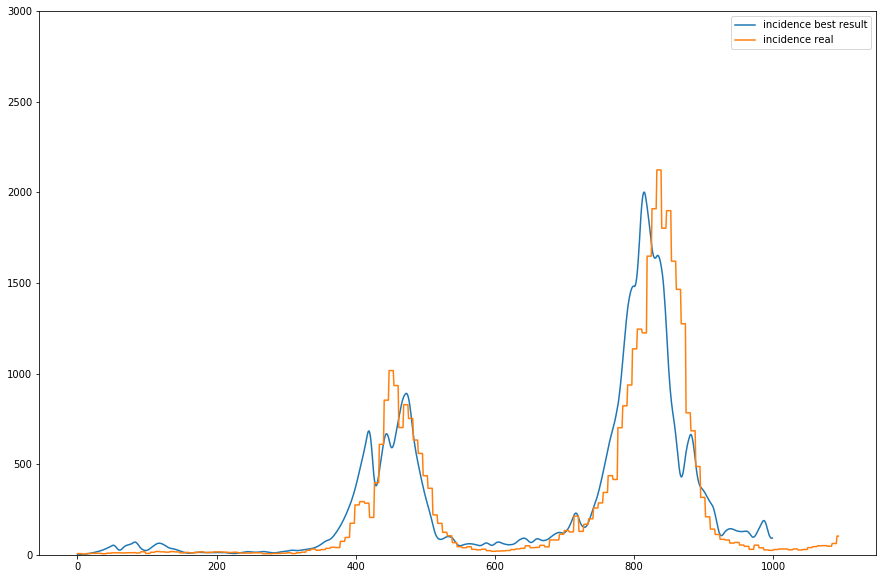

In [66]:
parameters = [1, 1, study.get_best_result()['a(t)'], 
              1, 1, study.get_best_result()['p_mh(t)'], 
              1, 1, study.get_best_result()['u_v'], 
              1, 1, 1, study.get_best_result()['k'], 
              1, study.get_best_result()['\gamma'], 
              study.get_best_result()['\delta'], 1]
estado_inicial = np.array([[
    1000, 0, 0.99, 0, 0.0, 
    study.get_best_result()['SH'], infected_percentage, infected_percentage, 
    1 - study.get_best_result()['SH'] - 2 * infected_percentage
]])
seir.update_parameters(parameters, estado_inicial)
incidence_simulated = seir.emulate(time_stamp = time_stamp)
result = seir.emulate()

fig = plt.figure(figsize=(15,10))

SEV = result[:,0]
IEV = result[:,1]
SV = result[:,2]
EV = result[:,3] 
IV = result[:,4] 

SH = result[:,5] 
EH = result[:,6]
IH = result[:,7]
RH = result[:,8]

Incidence = result[:,9]

plt.plot(Incidence, label="incidence best result")
plt.plot(incidence_real, label="incidence real")
#plt.plot(IH, label="infected")
#plt.plot(SV, label="recovered")
plt.ylim([0,3000])
plt.legend()

In [3]:
def o(T):
    min_value = 14.58
    max_value = 34.61
    return 0.00856 * T * (T - min_value) * ((max_value - T) ** (1./2))

In [6]:
o(25)

6.912628000000001